**Grupo 2**

Victor Bueno #3485

Jaqueline Shigueoka #90577

Marcelo Yukio Takahashi  #95305

Mateus Fernandes Carneiro dos Santos #90663 

Lucas Monteiro Da Silva #84756	

Valdir Nascimento Dos Santos #97581	

Alexandre Lopes #77882

# Import e Conhecendo os dados

In [ ]:
# Importação das bibliotecas
from google.colab import files

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [ ]:
# Upload dos dados
base = pd.read_csv('/content/Walmart 2.csv')

In [ ]:
# Preview da qualidade dos dados
base

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667




Você precisa avaliar a performance global das vendas semanais das lojas do Wallmart. Porém, o processo de estração de dados é devagar e custoso, por isso não seria possível recolher todas as vendas semanais do ano para fazer uma estimativa com precisão de 100%. A única saída é realizar uma amostragem dos dados de uma loja e em cima disso calcular o intervalo de confiança das vendas para que os superioes tenham uma noção da média das vendas da loja.

Pratique os conceitos de amostragem vistos na revisão dentro do dataset e ao final, calcule o intervalo de confiança para uma amostra de 25 e outra de 50 das vendas semanais da loja 20. O valor encontrado está dentro da média populacional da loja 20?

#**Etapa 1**



Nessa etapa iremos importar os dados e bibliotecas e verificar as vendas por loja


1.  Importar as bibliotecas e os dados
2.  Analisar os dados
3.  Verifique as vendas semanais por loja
4. Verifique se as vendas em período de feriado tem uma variação maior








#**Etapa 2**#

Nessa etapa iremos verificar os tipos de amostragem



1. Verifique as amostras (Simples, sistemática, estratificada e clusterizada)




#**Etapa 3 (PLUS)**#

Vamos analisar os dados das lojas conforme solicitado acima



1. Verificando as 20 lojas conforme solicitado utilizando distribuição normal

2. Filtrando o dataset e plotando seu histograma

3. Realizando o teste com amostragem aleatória simples com 25 amostras
4. Verificando a média da população
5. Visualizando a distruibuição por dados com ele são

6. Visualizando a distribuição dos dados aplicando o teorema do limite central

7. Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal

8. Verificando a média da população



# Etapa 01



## População

In [ ]:
# Todos os dados possíveis
base

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
base.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
base['Date'] = pd.to_datetime(base['Date'],format='%d-%m-%Y')

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


<Axes: xlabel='Store', ylabel='Weekly_Sales'>

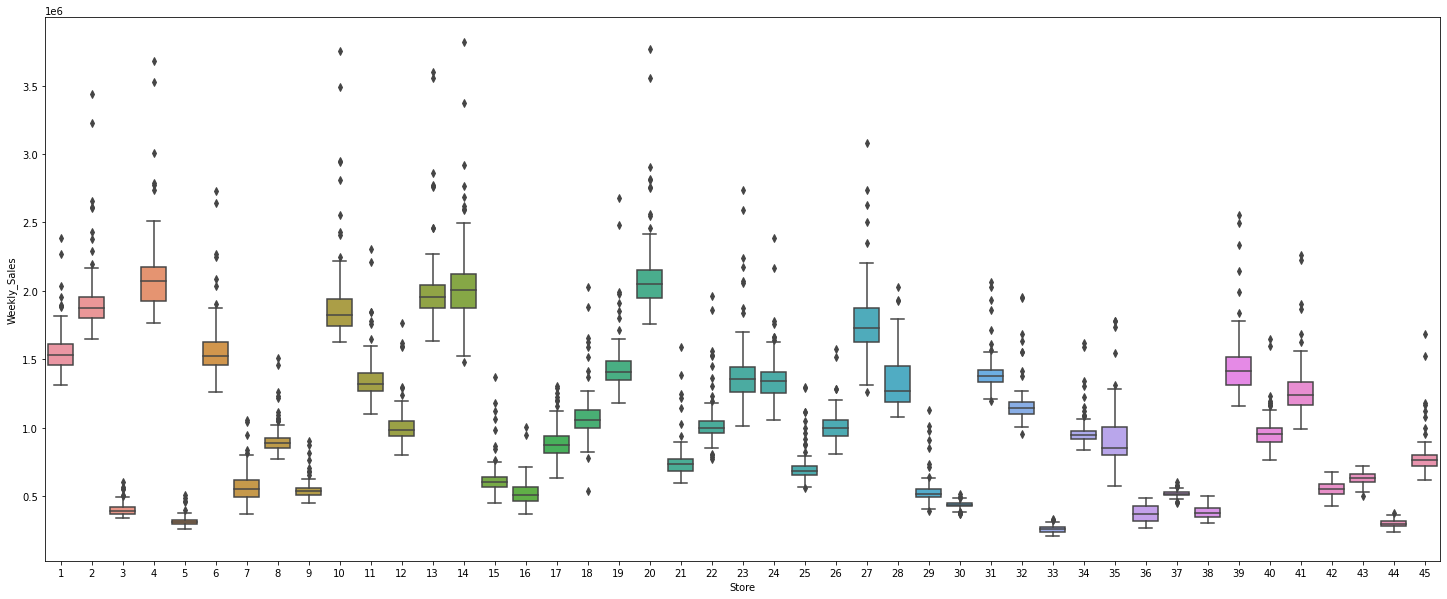

In [ ]:
# Boxplot das vendas semanais por loja
fig,axes=plt.subplots(figsize=(25,10))
sns.boxplot(data=base,y='Weekly_Sales',x='Store')

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

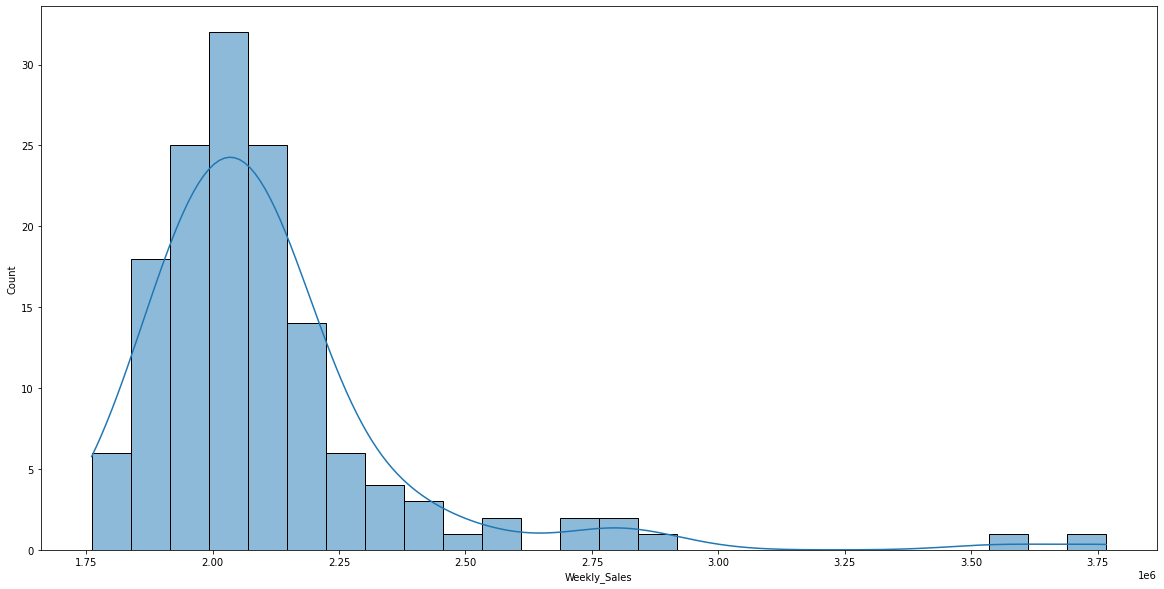

In [ ]:
# Distribuição das vendas semanais da loja 20
base_20 = base[(base["Store"]==20)]
plt.figure(figsize=(20,10))
sns.histplot(data=base_20,x='Weekly_Sales',kde=True)

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

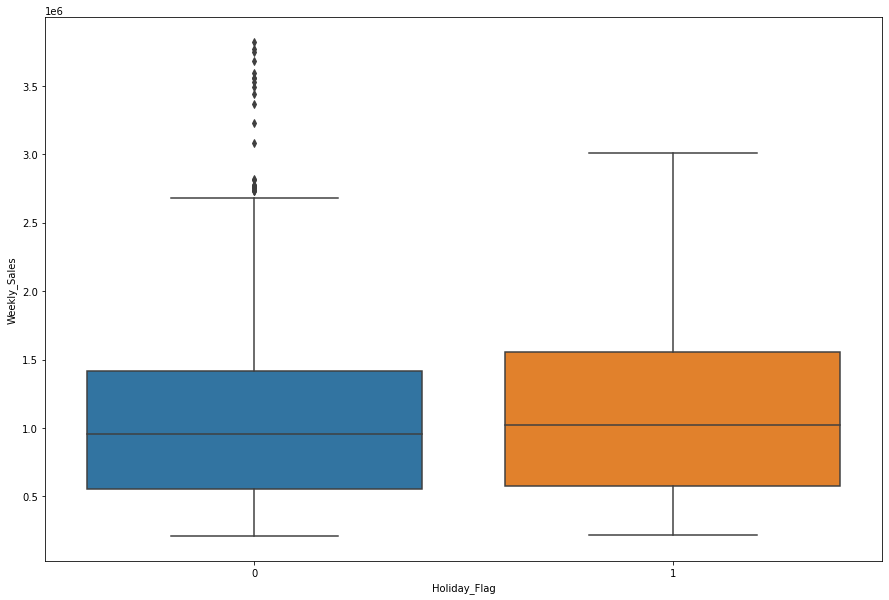

In [ ]:
# Verificando se as vendas em período de feriado tem uma variação maior
fig,axes=plt.subplots(figsize=(15,10))
sns.boxplot(data=base,y='Weekly_Sales',x='Holiday_Flag')

# Etapa 02

## Amostragem Simples 

In [ ]:
# Amostrando simples usando o random_state
# Tamanho da amostra de 363 com grau de confiança de 95% e margem de erro de 5%
sample = base.sample(363,random_state=123)
sample

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2689,19,2012-04-20,1255087.26,0,55.20,4.170,137.923067,8.150
2601,19,2010-08-13,1418027.08,0,72.71,2.923,132.630000,8.099
6206,44,2011-03-11,284496.14,0,41.28,3.346,128.399500,7.224
5926,42,2011-04-22,534597.69,0,75.93,3.917,128.955300,8.494
5863,42,2010-02-05,543384.01,0,54.34,2.962,126.442065,9.765
...,...,...,...,...,...,...,...,...
2845,20,2012-07-20,1970170.29,0,76.04,3.567,214.733135,7.280
4856,34,2012-09-21,943047.78,0,66.08,3.721,131.010333,9.285
6090,43,2011-09-16,618877.13,0,77.17,3.526,207.852714,10.641
3385,24,2011-12-09,1529615.54,0,42.30,3.627,136.503067,8.454


In [ ]:
# Amostrando simples usando o seed
np.random.seed(0)
base.sample(363)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3949,28,2011-10-14,1220984.94,0,67.31,3.805,129.770645,12.890
4555,32,2012-06-08,1246322.44,0,71.14,3.741,197.655186,8.090
2235,16,2011-10-28,505918.21,0,41.97,3.550,195.331898,6.232
5204,37,2011-03-04,527572.25,0,64.55,3.288,212.576205,8.395
3524,25,2011-11-11,719235.07,0,44.81,3.530,210.981020,7.082
...,...,...,...,...,...,...,...,...
3417,24,2012-07-20,1394299.00,0,76.42,3.732,138.233193,8.953
519,4,2011-10-28,2151659.59,0,55.31,3.362,129.793677,5.143
3350,24,2011-04-08,1273670.32,0,44.70,3.895,134.177774,8.212
4891,35,2010-08-27,917693.06,0,70.31,2.755,136.557015,8.861


In [ ]:
# Quantidade de classes distintas na amostra
base['Store'].sample(363,random_state=123).value_counts(normalize=True)

43    0.044077
8     0.035813
11    0.033058
5     0.033058
32    0.030303
38    0.030303
4     0.030303
36    0.030303
13    0.027548
19    0.027548
24    0.027548
42    0.027548
37    0.024793
27    0.024793
3     0.024793
18    0.024793
21    0.022039
12    0.022039
31    0.022039
44    0.022039
41    0.022039
2     0.022039
10    0.022039
20    0.022039
28    0.019284
34    0.019284
25    0.019284
17    0.019284
39    0.019284
15    0.019284
14    0.019284
30    0.019284
23    0.016529
9     0.016529
29    0.016529
7     0.016529
16    0.016529
22    0.016529
33    0.016529
1     0.016529
40    0.013774
26    0.013774
35    0.011019
6     0.011019
45    0.011019
Name: Store, dtype: float64

## Amostragem Sistemática 

In [ ]:
# Amostragem sistemática com passo e primeiro valor definidos
passo = 17
inicial = 1
indices = np.arange(inicial,base.shape[0],passo)
amostra = base.loc[indices]
amostra


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
18,1,2010-06-11,1542561.09,0,80.43,2.668,211.456095,7.808
35,1,2010-10-08,1508239.93,0,63.93,2.633,211.746754,7.838
52,1,2011-02-04,1606629.58,0,42.27,2.989,212.566881,7.742
69,1,2011-06-03,1635078.41,0,83.00,3.699,215.273655,7.682
...,...,...,...,...,...,...,...,...
6359,45,2011-05-20,727163.67,0,62.28,4.062,185.966115,8.521
6376,45,2011-09-16,711367.56,0,69.17,3.742,186.802400,8.625
6393,45,2012-01-13,676615.53,0,41.18,3.513,189.326096,8.424
6410,45,2012-05-11,770487.37,0,61.24,3.889,190.976417,8.567


## Amostragem Estratificada 

In [ ]:
# Verificando quantos tipos diferentes de classe temos na amostra
base['Store'].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [ ]:
# Amostragem estratificada usando train_test_split
from sklearn.model_selection import train_test_split
x1,x2 = train_test_split(base,test_size=363, stratify = base['Store'])
x2['Store'].value_counts()

32    9
10    9
28    9
6     8
29    8
17    8
27    8
12    8
30    8
35    8
14    8
3     8
11    8
2     8
1     8
26    8
22    8
15    8
25    8
40    8
16    8
20    8
5     8
34    8
4     8
36    8
9     8
23    8
8     8
38    8
45    8
18    8
43    8
42    8
37    8
21    8
44    8
24    8
7     8
31    8
33    8
39    8
41    8
13    8
19    8
Name: Store, dtype: int64

In [ ]:
x1["Store"].value_counts()

34    135
33    135
4     135
45    135
29    135
37    135
7     135
35    135
44    135
16    135
42    135
20    135
26    135
17    135
2     135
8     135
36    135
11    135
30    135
41    135
22    135
1     135
13    135
27    135
9     135
38    135
15    135
25    135
23    135
3     135
19    135
39    135
21    135
31    135
6     135
18    135
5     135
24    135
40    135
14    135
12    135
43    135
28    134
10    134
32    134
Name: Store, dtype: int64

## Amostragem Clusterizada 

In [ ]:
# Amostragem clusterizada selecionando apenas algumas semanas da loja 20
sample_cluster = base[base.Store==20].sample(frac=0.05)
sample_cluster

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2807,20,2011-10-28,2065421.52,0,49.36,3.569,210.691890,7.082
2837,20,2012-05-25,2114989.00,0,70.04,3.798,214.549942,7.139
2859,20,2012-10-26,2031650.55,0,60.04,3.882,216.151590,7.293
2746,20,2010-08-27,1946369.57,0,70.51,2.755,204.790031,7.527
2742,20,2010-07-30,1955896.59,0,76.03,2.781,204.605272,7.527
2816,20,2011-12-30,2043245.00,1,36.35,3.389,212.403576,7.082
2846,20,2012-07-27,1911559.10,0,74.60,3.647,214.738243,7.280


# Etapa 03 (PLUS)

## Distribuição Normal


<img alt="Correlação" width="85%" src="https://proeducacional.com/packages/uploads/2020/08/img_5f2ae87aaa0c2.png">


A partir deste momento, vamos analisar somente os dados da loja 20 conforme foi pedido lá em cima. Usando todos os dados da loja 20, veja se as vendas seguem uma distribuição normal.

In [ ]:
# Filtrando o dataset e vendo seu histograma
base_20.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,2010-02-05,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,2010-02-12,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187
2720,20,2010-02-26,1898193.95,0,32.32,2.754,204.463087,8.187
2721,20,2010-03-05,2119213.72,0,31.75,2.777,204.494073,8.187


<Axes: xlabel='Weekly_Sales', ylabel='Count'>

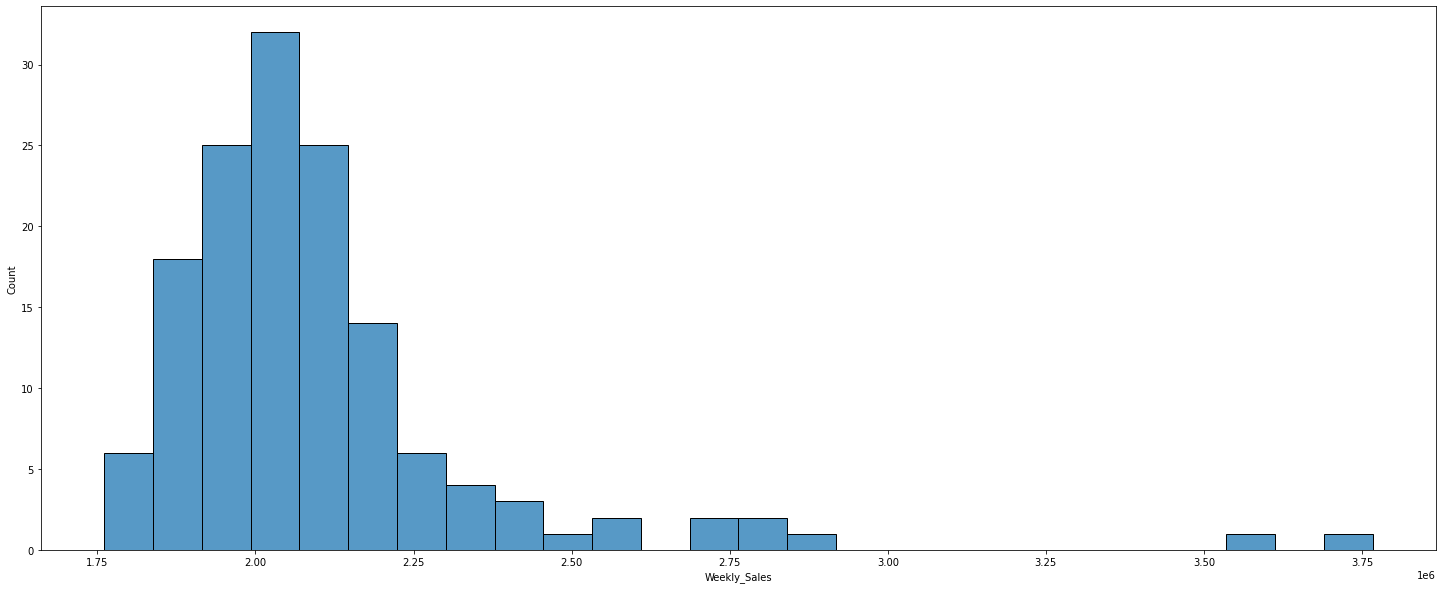

In [ ]:
fig,axes=plt.subplots(figsize=(25,10))
sns.histplot(data=base_20,x="Weekly_Sales")

<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





<img alt="Correlação" width="85%" src="https://www.dummies.com/wp-content/uploads/451825.image0.jpg">





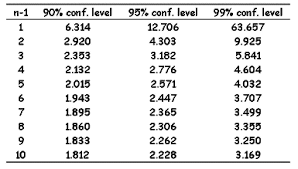

![](https://www.statisticshowto.com/wp-content/uploads/2021/12/confidence-limits.bmp)

In [ ]:
# Realizando o teste com uma amostragem aleatória simples com 25 amostras -> Teste T
amostra_20 = base_20.sample(25,random_state=0)
confidence = 0.95
dof = amostra_20.shape[0]-1

intervalo = stats.t.interval(confidence=confidence, df=dof, loc=amostra_20.Weekly_Sales.mean(), scale=stats.sem(amostra_20.Weekly_Sales))
intervalo

(2028917.2499684282, 2255093.4844315723)

In [ ]:
# Verificando a média da população
base_20.Weekly_Sales.mean()

2107676.8703496507

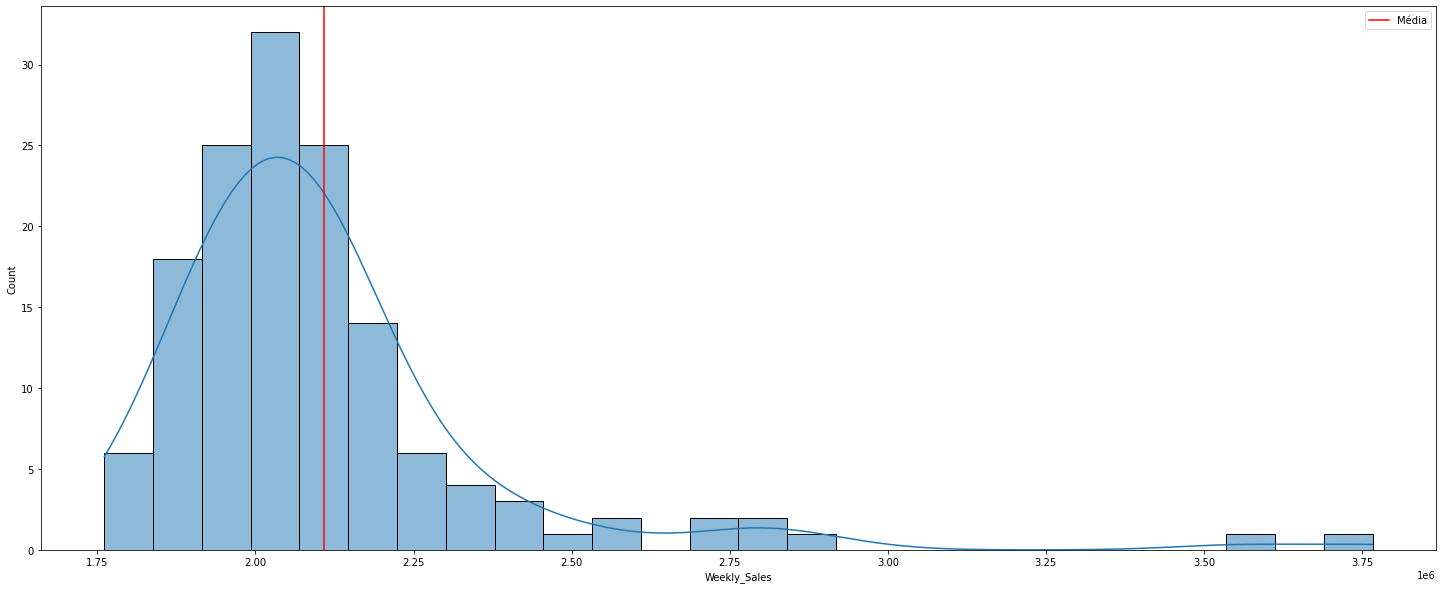

In [ ]:
# Visualizando a distribuição dos dados como ele são
fig,axes=plt.subplots(figsize=(25,10))
sns.histplot(data=base_20,x="Weekly_Sales",kde=True)
plt.axvline(base_20.Weekly_Sales.mean(),0,40,c='Red',label='Média')
plt.legend();

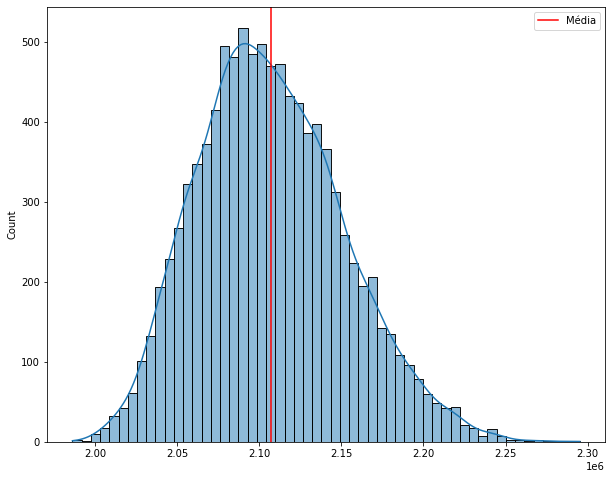

In [ ]:
# Visualizando a distribuição dos dados aplicando o teorema do limite central
val_list = []
for i in range(10000):
  val_list.append(base_20.sample(30).Weekly_Sales.mean())

fig,axes=plt.subplots(figsize=(10,8))
sns.histplot(val_list,kde=True)
plt.axvline(np.array(val_list).mean(),c='Red',label="Média")
plt.legend();


In [ ]:
# Realizando o teste com uma amostragem aleatória simples com 50 amostras -> Teorema do Limite Central -> Teste Normal
amostra_20_1 = base_20.sample(50,random_state=0)
confidence=0.95

interval = stats.norm.interval(confidence=confidence, loc=amostra_20_1.Weekly_Sales.mean(), scale=stats.sem(amostra_20_1.Weekly_Sales))
interval


(2071485.9996257257, 2210783.6619742736)

In [ ]:
# Verificando a média da população
base_20.Weekly_Sales.mean()

2107676.8703496507

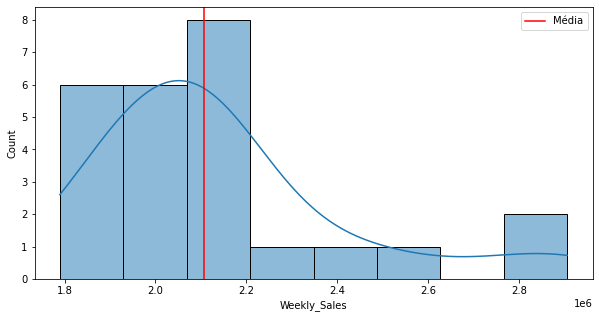

In [ ]:
fig,axes=plt.subplots(figsize=(10,5))
sns.histplot(data=amostra_20,x="Weekly_Sales",kde=True)
plt.axvline(base_20.Weekly_Sales.mean(),0,40,c='Red',label='Média')
plt.legend();

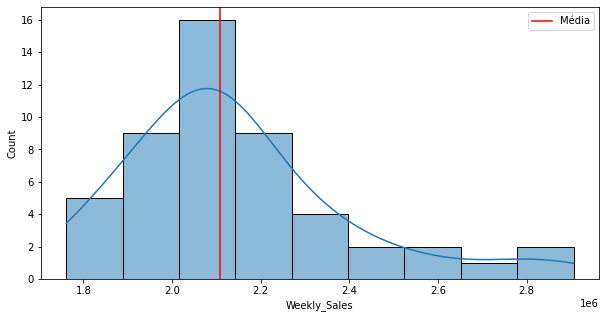

In [ ]:
fig,axes=plt.subplots(figsize=(10,5))
sns.histplot(data=amostra_20_1,x="Weekly_Sales",kde=True)
plt.axvline(base_20.Weekly_Sales.mean(),0,40,c='Red',label='Média')
plt.legend();